In [ ]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# for displaying the plots in the notebook.
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import & Exploration Data

## Data: ชุดข้อมูลเกี่ยวกับบ้านเช่าในบราซิล โดยชุดข้อมูลนี้มีบ้านเช่าจำนวนทั้งหมด 10,692 หลัง

## Attribute Information:
- city : เมืองที่เป็นที่ตั้งของบ้านเช่า
- area : พื้นที่ของบ้านเช่า
- room : จำนวนห้องพัก
- batroom : จำนวนห้องน้ำ
- parking_spaces : พื้นที่จอดรถ
- floor : ระดับความสูงพื้น
- animal : บ้านเช่าที่อนุญาตให้เลี้ยงสัตว์ได้?
- furniture : บ้านเช่ามีเฟอร์นิเจอร์?
- hoa_tex : ภาษีค่าบริการสาธารณะ
- rent_amount : จำนวนเงินค่าเช่า
- pronety_tex : ภาษีทรัพย์สิน
- fire_insurance : ประกันอัคคีภัย
- total : ค่าเช่าทั้งหมด

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data Visualization/houses_to_rent_v2.csv')

In [ ]:
df.shape

(10692, 13)

In [ ]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [ ]:
df.columns = ['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor', 'animal', 'furniture', 'hoa_tex', 'rent_amount', 'property_tex', 'fire_insurance', 'total']

In [ ]:
df.sample(3)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa_tex,rent_amount,property_tex,fire_insurance,total
10300,São Paulo,192,4,5,4,11,not acept,furnished,2800,15000,90,191,18080
10222,São Paulo,70,3,1,0,-,acept,not furnished,0,1300,0,20,1320
618,São Paulo,117,2,1,1,5,not acept,furnished,720,2700,11,35,3466


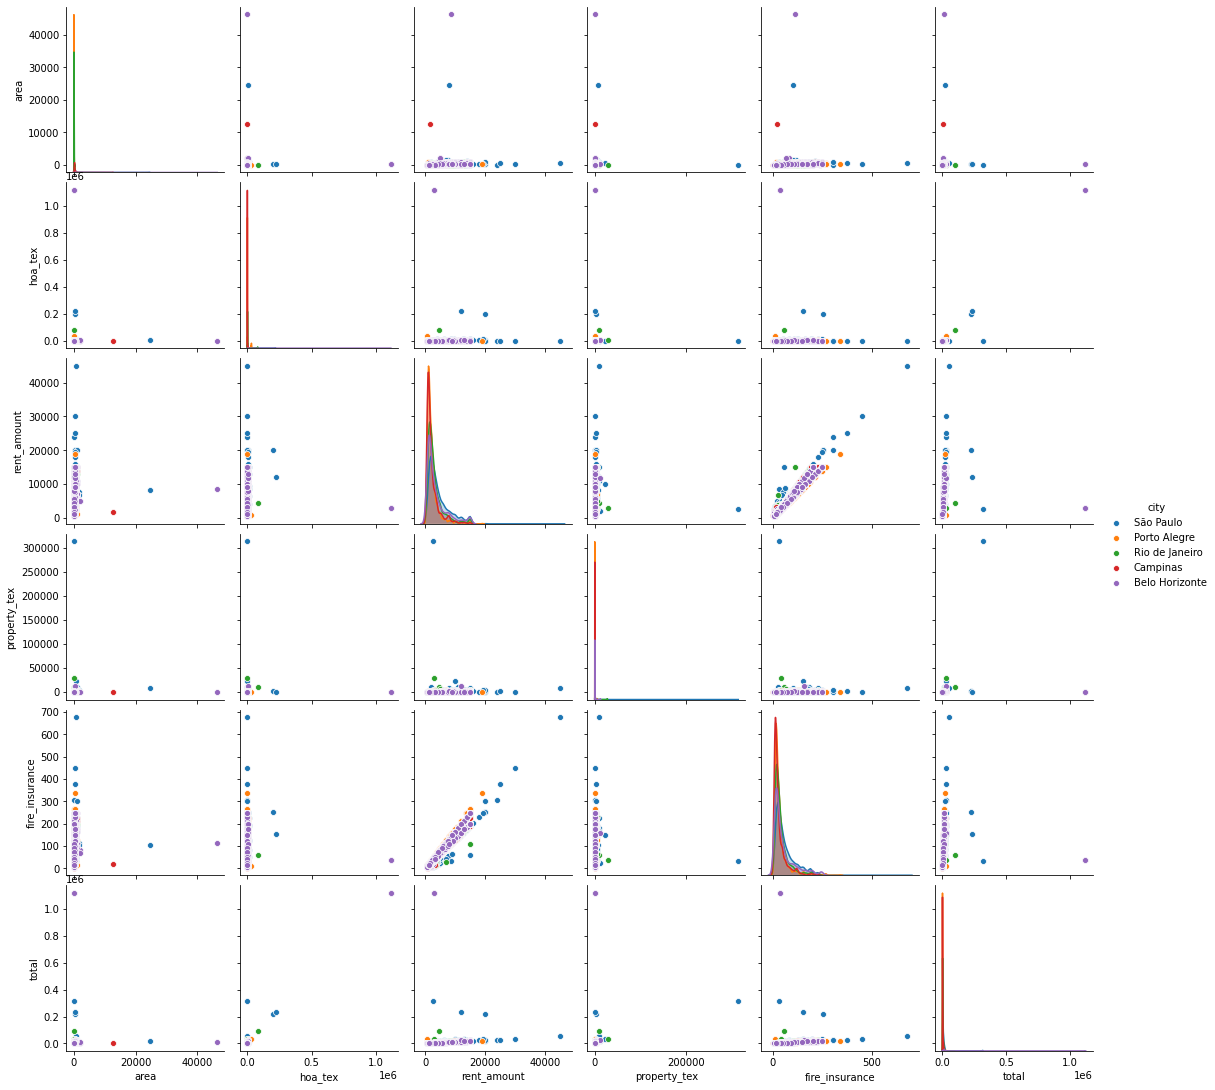

In [ ]:
### Pair Plot ###
sns.pairplot(data=df[['city','area','hoa_tex', 'rent_amount', 'property_tex', 'fire_insurance', 'total' ]],hue = 'city' )

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams["axes.labelsize"] = 15

สรุป

---


จาก Pair Plot ข้างบน เราจะเห็นได้ว่าค่าของ fire_insurance กับค่า rent_amount มีความสัมพันธ์กันมาก ส่วนคู่อื่นๆนั้น เราจะเห็นได้ว่ามันอาจจะมีความสัมพันธ์กันที่น้อยมาก

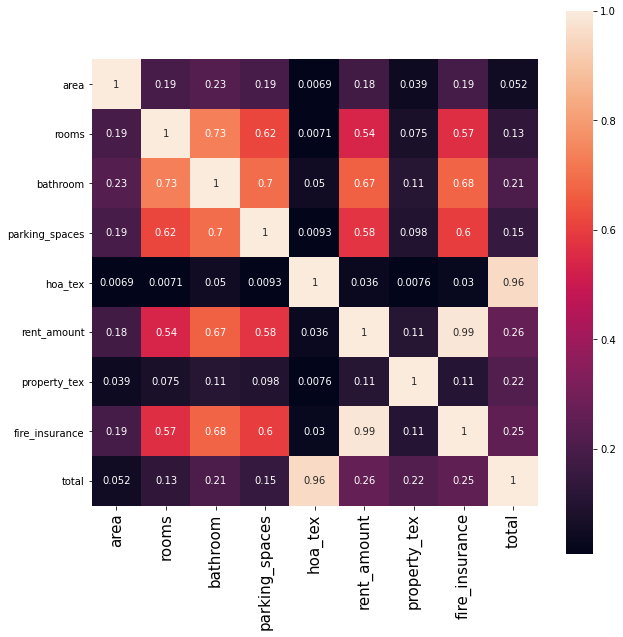

In [ ]:
### Heat map ###
cor = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cor, annot=True, square=True);

สรุป

---


จากรูป เป็นรูปที่แสดงความสัมพันธ์ของตัวแปรทุกตัวแปร และสีในรูปเป็นการบ่งบอกถึงระดับความสัมพันธ์ของตัวแปรต่างๆ

ซึ่งในที่นี้เราสนใจในเรื่องราคาบ้านเช่า (rent_amount) จากรูปก็จะสามารถดูได้ว่าตัวแปรไหนที่ส่งผลมากต่อราคาบ้านเช่าบ้าง

1. ตัวแปร fire_insurance หรือประกันอัคคีภัย ที่มีความสัมพันธ์มากถึง 0.99 
2. ตัวแปร bathroom หรือห้องน้ำที่มีการใช้บริการ ที่มีความสัมพันธ์มากถึง 0.67



# For Seaborn : Multiple Graph in 1 picture.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

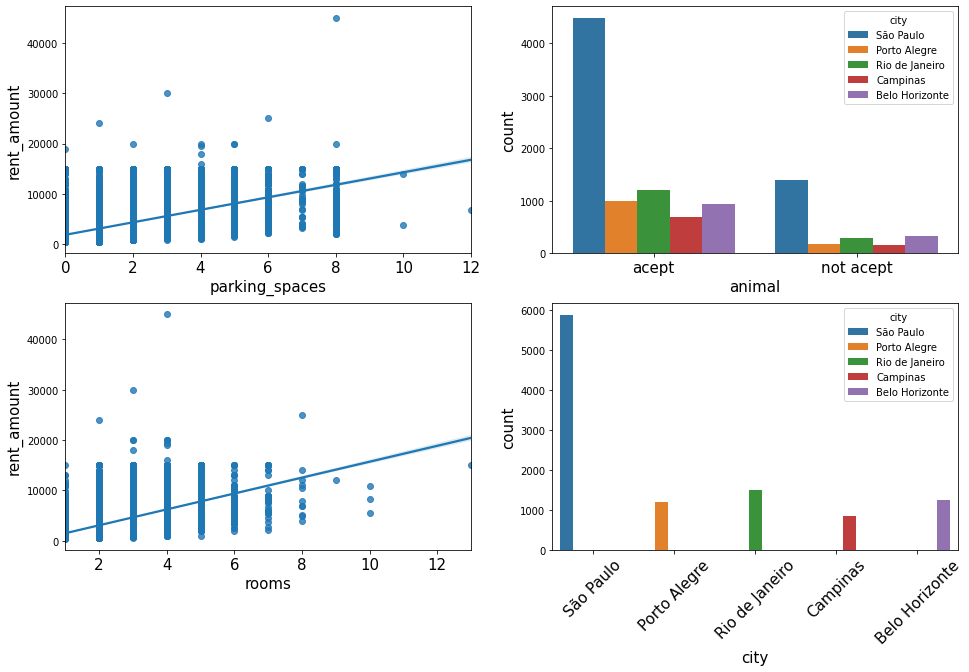

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

sns.regplot(x = 'parking_spaces',y = 'rent_amount', data = df, ax = axes[0,0])
sns.regplot(x = 'rooms',y = 'rent_amount', data = df, ax = axes[1,0])
sns.countplot(df['animal'],hue = df['city'], ax = axes[0,1])
sns.countplot(df['city'],hue = df['city'], ax = axes[1,1])
plt.xticks(rotation=45)

สรุป

---


จากกราฟข้างบนเราได้ทำการแบ่งออกเป็น 4 กราฟ โดย

- กราฟแรกเราจะพิจารณา ค่าเช่า กับ พื้นที่จอดรถ เราจะเห็นได้ว่า พื้นที่จอดรถไม่ได้เพิ่มขึ้นตามราคาค่าเช่า
- กราฟที่สองนั้น เป็นการพิจารณาจำนวนของบ้านเช่าที่อนุญาตให้เลี้ยงสัตว์ได้ กับ ไม่อนุญาตให้เลี้ยงสัตว์ เราทำการนับจำนวนบ้านเช่าของแต่ละเมืองเอาไว้แล้วมาเปรียบเทียบกัน ซึ่งจะเห็นได้ว่า Sao Paulo นั้นมีบ้านเช่าที่อนุญาตให้เลี้ยงสัตว์ได้จำนวนมากที่สุดใน 5 เมือง และ Sao Paulo นั้นยังเป็นเมืองที่มีบ้านเช่าที่ไม่ได้อนุญาตให้เลี้ยงสัตว์มากที่สุดใน 5 อีกด้วย
- กราฟที่สามนั้น เป็นการพิจารณาค่าเช่า กับ จำนวนของห้องในบ้านเช่า เราก็จะเห็นได้ว่าต่อให้ค่าเช่าแพงขึ้นมากเท่าไหร่จำนวนห้องนั้นก็จะไม่ได้มากขึ้นตาม ดังนั้น ค่าเช่าจะต้องมีปัจจัยอื่นๆที่เกี่ยวข้องอีก
- กราฟสุดท้าย เป็นการพิจาณาจำนวนบ้านเช่า กับเมืองทั้ง 5 เมือง ที่เราทำการนับบ้านเช่าของแต่ละเมืองเอาไว้ แล้วเอามาเปรียบเทียบกัน เราจะเห็นได้ว่า Sao Paulo นั้นมีบ้านเช่ามากที่สุดใน 5 เมืองอีกด้วย

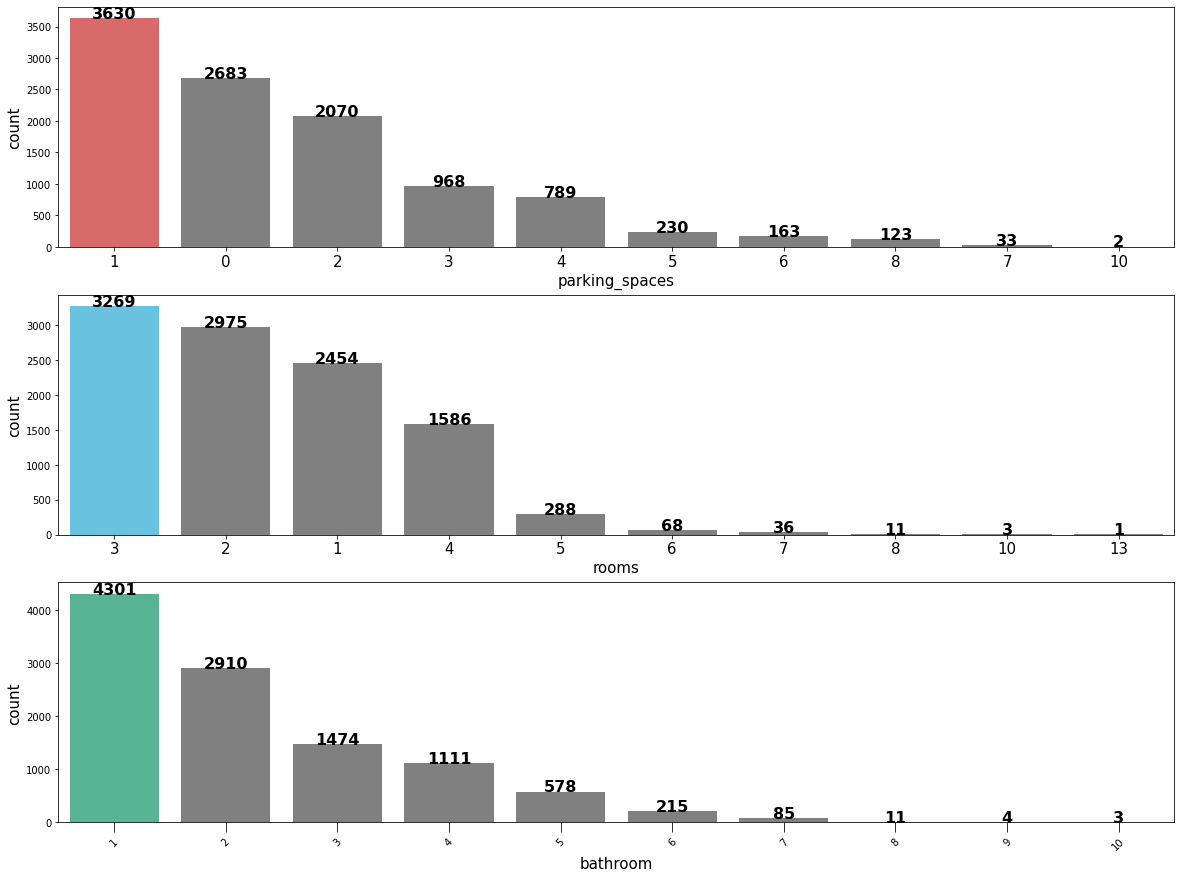

In [ ]:
fig, axes = plt.subplots(nrows= 3, ncols = 1, figsize = (20,15))

y_ax0_ls = df['parking_spaces'].value_counts()[:10].values
p01 =['gray' if (x < max(y_ax0_ls)) else '#EB5757' for x in y_ax0_ls]
sns.countplot(x = 'parking_spaces', data=df, ax = axes[0], 
              order = df['parking_spaces'].value_counts()[:10].index,
              palette = p01)

for x_text, y_text in enumerate(y_ax0_ls):
    axes[0].text(x_text,y_text,
                 y_text,
                 horizontalalignment='center', 
                 size='medium', color='black',
                 weight='semibold', fontsize=16)

y_ax1_ls = df['rooms'].value_counts()[:10].values
p02 =['gray' if (x < max(y_ax1_ls)) else '#56CCF2' for x in y_ax1_ls]
sns.countplot(x = 'rooms', data=df, ax = axes[1], 
              order = df['rooms'].value_counts()[:10].index,
              palette = p02)

for x_text, y_text in enumerate(y_ax1_ls):
    axes[1].text(x_text,y_text,
                 y_text,
                 horizontalalignment='center', 
                 size='medium', color='black',
                 weight='semibold', fontsize=16)
    
y_ax2_ls = df['bathroom'].value_counts().sort_index().values
p03 =['gray' if (x < max(y_ax2_ls)) else '#4AC29A' for x in y_ax2_ls]
sns.countplot(x = 'bathroom', data=df, ax = axes[2], 
              order = sorted(df['bathroom'].unique()),
              palette = p03)

for x_text, y_text in enumerate(y_ax2_ls):
    axes[2].text(x_text,y_text,
                 y_text,
                 horizontalalignment='center', 
                 size='medium', color='black',
                 weight='semibold', fontsize=16)
    
axes[2].tick_params('x', labelsize=10, labelrotation=45, size=10)

สรุป

---


- กราฟแรก เป็นการพิจารณาจำนวนบ้านเช่า กับ พื้นที่จอดรถ เราจะเห็นได้ว่าบ้านเช่าที่มีที่พื้นที่ให้จอดรถได้ 1 คัน มีจำนวน 3,630 หลัง และบ้านเช่าที่มีพื้นที่ให้จอดรถได้ 1 คันนี้มีจำนวนมากที่สุด
- กราฟที่สอง เป็นการพิจารณาจำนวนบ้านเช่า กับ ห้องในบ้านเช่า เราจะเห็นได้ว่าบ้านเช่าที่มีห้อง 3 ห้อง มีจำนวน 3,269 หลัง และบ้านเช่าที่มีห้อง 3 ห้องนี้มีจำนวนมากที่สุด
- กราฟที่สาม เป็นการพิจารณาจำนวนบ้านเช่า กับ ห้องน้ำในบ้านเช่า เราจะเห็นได้ว่าบ้านเช่าที่มีห้องน้ำ 1 ห้อง มีจำนวน 4,301 หลัง และบ้านเช่าที่มีห้องน้ำ 1 ห้องนี้มีจำนวนมากที่สุด